In [1]:
# library import

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
df = pd.read_csv("C:/users/JunYoungPark/ai_study/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# 결측값 확인
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

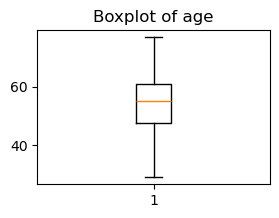

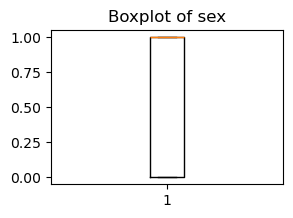

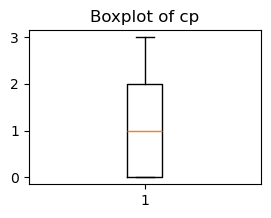

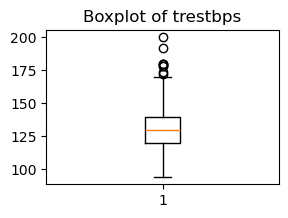

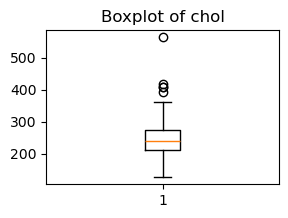

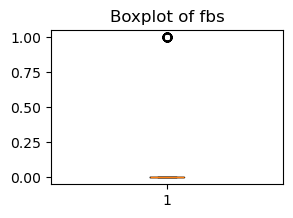

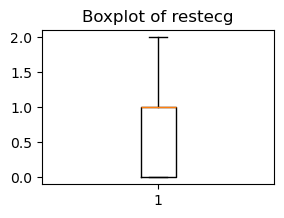

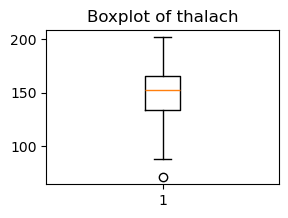

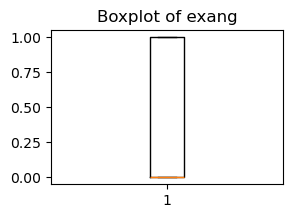

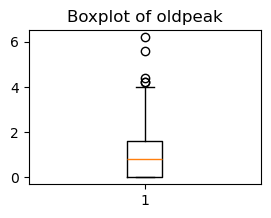

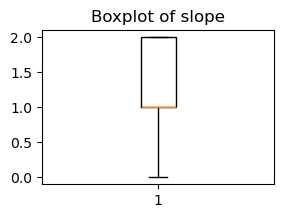

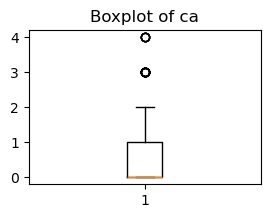

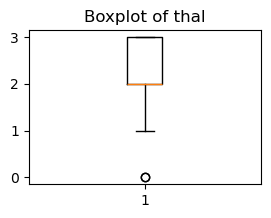

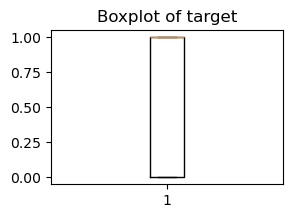

In [4]:
# outlier 시각적으로 확인 
for col in df.columns:
    plt.figure(figsize=(3, 2))
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

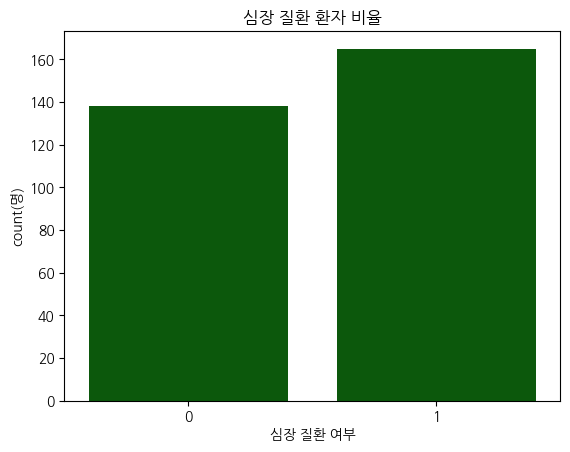

In [7]:
# target 비율 확인
sns.barplot(df['target'].value_counts(), color='darkgreen')
plt.rcParams['font.family'] = 'NanumGothic'
plt.title("심장 질환 환자 비율")
plt.xlabel("심장 질환 여부")
plt.ylabel("count(명)")
plt.show()

C:\Users\JunYoungPark\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
C:\Users\JunYoungPark\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


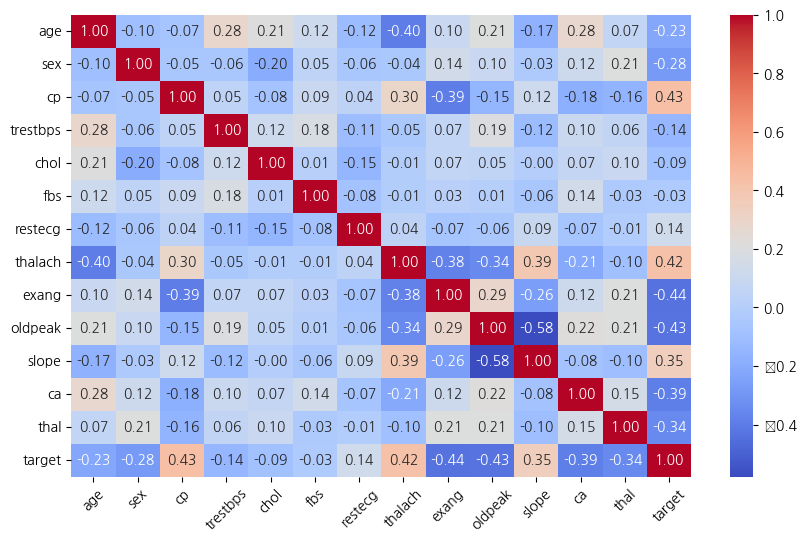

In [8]:
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45)
plt.show()

In [11]:
# X, y 설정
X = df.drop(columns=['target'])
y = df['target']